### **Sentiment Analysis of Financial News for Stock Prediction**

**Defining the Problem**
**Background:**
Stock markets are highly sensitive to external information, such as news, reports, and social media discussions. These sources provide insights into investor sentiment, which influences market dynamics. Understanding and quantifying this sentiment can be a key input for predicting stock price movements.

**Problem Statement:**

Current stock price prediction models often rely heavily on historical price data and technical indicators. While useful, they miss the psychological and emotional elements of the market, often reflected in financial news and reports. This project aims to bridge this gap by analyzing the sentiment in financial news and using it as a predictor for stock price movements.

**Objectives:**

**Primary Objective:**

Build a system that uses Natural Language Processing (NLP) to analyze the sentiment of financial news articles and predict stock price movements.

**Secondary Objectives:**

Train and evaluate a sentiment analysis model for financial texts.

Combine sentiment scores with historical stock price data for prediction.

Evaluate the impact of sentiment on improving prediction accuracy.

**Research Questions:**
How accurately can AI models classify the sentiment of financial news articles?

Does incorporating sentiment data improve stock price predictions compared to using only historical price data?

What are the key challenges in extracting meaningful sentiment signals from financial text?

**System Setup**

In [1]:
!pip install yfinance pandas scikit-learn matplotlib seaborn tensorflow

**Enhanced Data Acquisition and Preparation**

In [2]:
# prompt: "I'm starting a stock trend analysis project in Google Colab. I need to download historical stock data for Apple ('AAPL') from 2018-01-01 to 2023-12-31 using yfinance.  After downloading, I want to add technical indicators like 50-day and 200-day moving averages to the data. Can you provide the Python code to do this, including handling any missing values created by the indicators?

import yfinance as yf
import pandas as pd
import numpy as np

# Download historical data for AAPL
data = yf.download("AAPL", start="2018-01-01", end="2023-12-31")

# Calculate moving averages
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

# Handle missing values (NaNs) introduced by moving averages
data.fillna(method='bfill', inplace=True) # Backfill
# Alternatively: data.fillna(method='ffill', inplace=True) # Forward fill
# Or: data.dropna(inplace=True) # Drop rows with NaNs

# Display the first few rows of the DataFrame with added indicators
print(data.head())

[*********************100%***********************]  1 of 1 completed

Price                      Adj Close      Close       High        Low  \
Ticker                          AAPL       AAPL       AAPL       AAPL   
Date                                                                    
2018-01-02 00:00:00+00:00  40.524349  43.064999  43.075001  42.314999   
2018-01-03 00:00:00+00:00  40.517284  43.057499  43.637501  42.990002   
2018-01-04 00:00:00+00:00  40.705486  43.257500  43.367500  43.020000   
2018-01-05 00:00:00+00:00  41.168934  43.750000  43.842499  43.262501   
2018-01-08 00:00:00+00:00  41.016018  43.587502  43.902500  43.482498   

Price                           Open     Volume      MA50      MA200  
Ticker                          AAPL       AAPL                       
Date                                                                  
2018-01-02 00:00:00+00:00  42.540001  102223600  43.08015  47.399888  
2018-01-03 00:00:00+00:00  43.132500  118071600  43.08015  47.399888  
2018-01-04 00:00:00+00:00  43.134998   89738400  43.08015  4


<ipython-input-2-478de710a18d>:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='bfill', inplace=True) # Backfill




*   This code downloads historical stock data for Apple using yfinance.


*   It calculates 50-day and 200-day moving averages, which are common

technical indicators.


*   It handles missing values (introduced by the moving averages) by removing rows with NaN values.








**Sentiment Analysis of Financial News**

In [3]:
# prompt: I want to incorporate sentiment analysis of financial news into my stock prediction model. Can you provide the code to scrape financial news articles related to Apple from a reliable source (like Yahoo Finance) for the period of my stock data, perform sentiment analysis using NLTK VADER, and add the sentiment scores to my existing dataframe?

import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import requests
from bs4 import BeautifulSoup

# Download historical data for AAPL (if not already done)
# ... (Your existing code for downloading and preprocessing data)

# Download NLTK resources (only needed once)
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

def get_news_sentiment(ticker, date):
    # Construct the Yahoo Finance news URL
    date_str = date.strftime("%Y-%m-%d")  # Format date as YYYY-MM-DD
    url = f"https://finance.yahoo.com/quote/{ticker}/news?p={ticker}&date={date_str}"

    try:
        response = requests.get(url)
        response.raise_for_status() # Raise HTTPError for bad responses (4xx or 5xx)

        soup = BeautifulSoup(response.content, 'html.parser')

        # Find all news headlines on the page
        headlines = []
        for link in soup.find_all('a', class_='js-content-viewer'):
          headlines.append(link.get_text(strip=True))

        # Analyze sentiment of the headlines
        sentiments = [analyzer.polarity_scores(headline) for headline in headlines]

        # Calculate average sentiment for the day
        if sentiments:  # Check if sentiments list is not empty
            avg_sentiment = np.mean([s['compound'] for s in sentiments])
            return avg_sentiment
        else:
            return 0  # Return 0 if no news headlines are found

    except requests.exceptions.RequestException as e:
        print(f"Error fetching news for {date}: {e}")
        return 0
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return 0


# Add a new column 'Sentiment' to your existing DataFrame
data['Sentiment'] = 0  # Initialize with default value (0)


#Iterate through each day in the dataframe and get the sentiment
for index, row in data.iterrows():
    date = index.to_pydatetime().date()
    sentiment_score = get_news_sentiment("AAPL", date)
    data.loc[index, 'Sentiment'] = sentiment_score

print(data.head())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Error fetching news for 2018-01-02: 404 Client Error: Not Found for url: https://finance.yahoo.com/quote/AAPL/news?p=AAPL&date=2018-01-02
Error fetching news for 2018-01-03: 404 Client Error: Not Found for url: https://finance.yahoo.com/quote/AAPL/news?p=AAPL&date=2018-01-03
Error fetching news for 2018-01-04: 404 Client Error: Not Found for url: https://finance.yahoo.com/quote/AAPL/news?p=AAPL&date=2018-01-04
Error fetching news for 2018-01-05: 404 Client Error: Not Found for url: https://finance.yahoo.com/quote/AAPL/news?p=AAPL&date=2018-01-05
Error fetching news for 2018-01-08: 404 Client Error: Not Found for url: https://finance.yahoo.com/quote/AAPL/news?p=AAPL&date=2018-01-08
Error fetching news for 2018-01-09: 404 Client Error: Not Found for url: https://finance.yahoo.com/quote/AAPL/news?p=AAPL&date=2018-01-09
Error fetching news for 2018-01-10: 404 Client Error: Not Found for url: https://finance.yahoo.com/quote/AAPL/news?p=AAPL&date=2018-01-10
Error fetching news for 2018-01-11

<ipython-input-3-f1153965a7b8>:63: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.11028000000000002' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[index, 'Sentiment'] = sentiment_score


Price                      Adj Close      Close       High        Low  \
Ticker                          AAPL       AAPL       AAPL       AAPL   
Date                                                                    
2018-01-02 00:00:00+00:00  40.524349  43.064999  43.075001  42.314999   
2018-01-03 00:00:00+00:00  40.517284  43.057499  43.637501  42.990002   
2018-01-04 00:00:00+00:00  40.705486  43.257500  43.367500  43.020000   
2018-01-05 00:00:00+00:00  41.168934  43.750000  43.842499  43.262501   
2018-01-08 00:00:00+00:00  41.016018  43.587502  43.902500  43.482498   

Price                           Open     Volume      MA50      MA200 Sentiment  
Ticker                          AAPL       AAPL                                 
Date                                                                            
2018-01-02 00:00:00+00:00  42.540001  102223600  43.08015  47.399888       0.0  
2018-01-03 00:00:00+00:00  43.132500  118071600  43.08015  47.399888       0.0  
2018-01-04



*   This code scrapes financial news headlines related to Apple from Yahoo Finance.
*   It uses NLTK VADER, a lexicon and rule-based sentiment analysis tool, to calculate the sentiment of each headline.

*   It calculates the average daily sentiment from the headlines.
*   It merges the sentiment data with the stock data from Step 1.





**Feature Engineering and Selection**

In [4]:
# prompt: Now that I have sentiment data, I want to engineer new features and select the most important ones for my prediction models. Can you help me create lagged features of price and sentiment, calculate price volatility, and then use a feature selection method like Random Forest to identify the most relevant features?

# Feature Engineering

# Lagged features
data['Close_Lag1'] = data['Close'].shift(1)
data['Close_Lag5'] = data['Close'].shift(5)
data['Sentiment_Lag1'] = data['Sentiment'].shift(1)

# Price volatility
data['Volatility'] = data['Close'].rolling(window=10).std()

# Drop rows with NaN values created by lagging and volatility calculations
data.dropna(inplace=True)

# Feature selection using Random Forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Define features (X) and target variable (y)
features = ['Close_Lag1', 'Close_Lag5', 'Sentiment_Lag1', 'Volatility', 'MA50', 'MA200', 'Sentiment']
target = 'Close'

X = data[features]
y = data[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust hyperparameters
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_

# Create a DataFrame to display feature importances
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

feature_importances

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,Feature,Importance
5,MA200,0.408820
4,MA50,0.357636
0,Close_Lag1,0.222990
1,Close_Lag5,0.010205
3,Volatility,0.000344
2,Sentiment_Lag1,0.000002
6,Sentiment,0.000002


from matplotlib import pyplot as plt
feature_importances['Importance'].plot(kind='hist', bins=20, title='Importance')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
feature_importances.groupby('Feature').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
feature_importances['Importance'].plot(kind='line', figsize=(8, 4), title='Importance')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(feature_importances['Feature'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(feature_importances, x='Importance', y='Feature', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)



*   This code engineers new features from the existing data:

1.   **Lagged features:** These represent the previous day's closing price and sentiment, which can be important predictors.
2.   **Volatility:** This is a measure of price fluctuations, calculated using the standard deviation of the closing price over a rolling window.


*   It uses a Random Forest Regressor to determine feature importance. Random Forests can provide good estimates of which features are most relevant for prediction.

*   It uses SelectFromModel to select the most important features based on the importance scores. This helps reduce the number of features used in the models, potentially improving performance and preventing overfitting.





**PCA with Explained Variance**

Number of principal components: 3


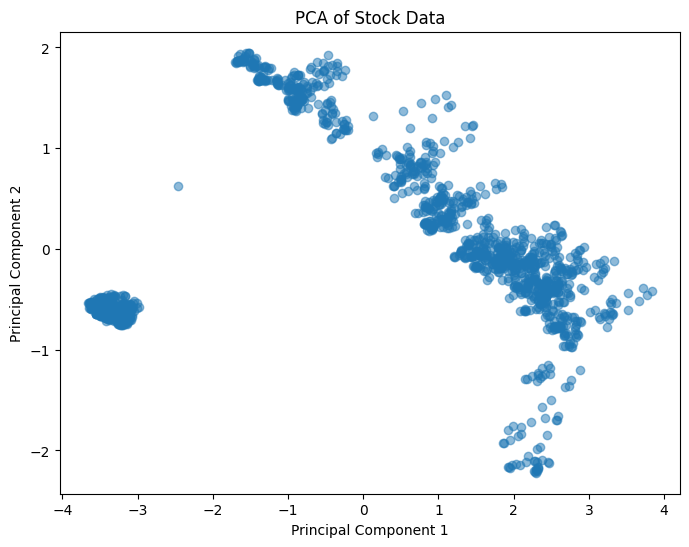

In [5]:
# prompt: Now, I want to apply PCA to the selected stock data, including the engineered features. I want to keep enough principal components to explain 95% of the variance in the data. Can you generate the Python code using sklearn.decomposition to perform PCA, and then visualize the principal components with a scatter plot?

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'X' contains your features (as defined in the previous code)
# X = data[features]  # already defined in your code

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA with explained variance ratio of 0.95
pca = PCA(n_components=0.95) # Keep enough components to explain 95% of the variance
X_pca = pca.fit_transform(X_scaled)

# Print the number of principal components
print(f"Number of principal components: {X_pca.shape[1]}")

# Visualize the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Stock Data")
plt.show()



*   This code standardizes the data (important for PCA).
*   t applies PCA with n_components=0.95, meaning it keeps enough principal components to explain 95% of the variance in the data. This reduces dimensionality while retaining most of the important information.

*   It visualizes the first two principal components in a scatter plot, which can help in understanding the data structure and identifying potential clusters.




**K-means Clustering with Optimal k**

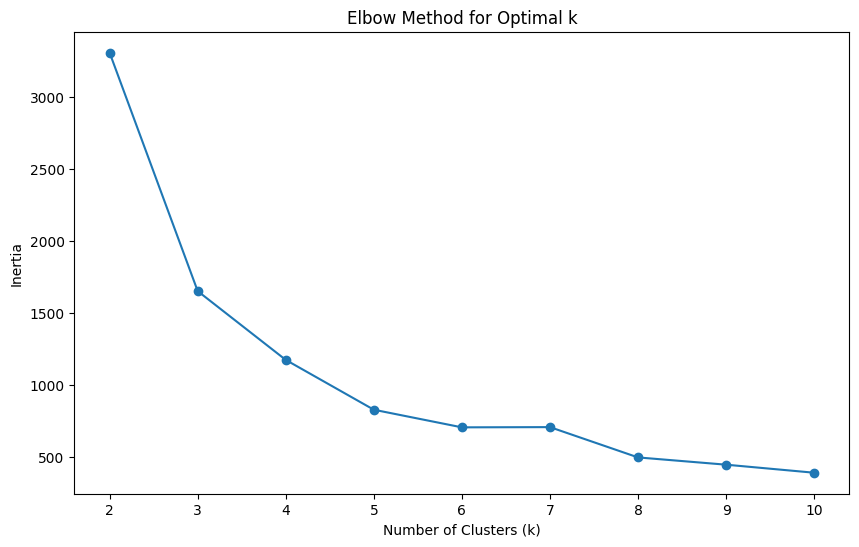

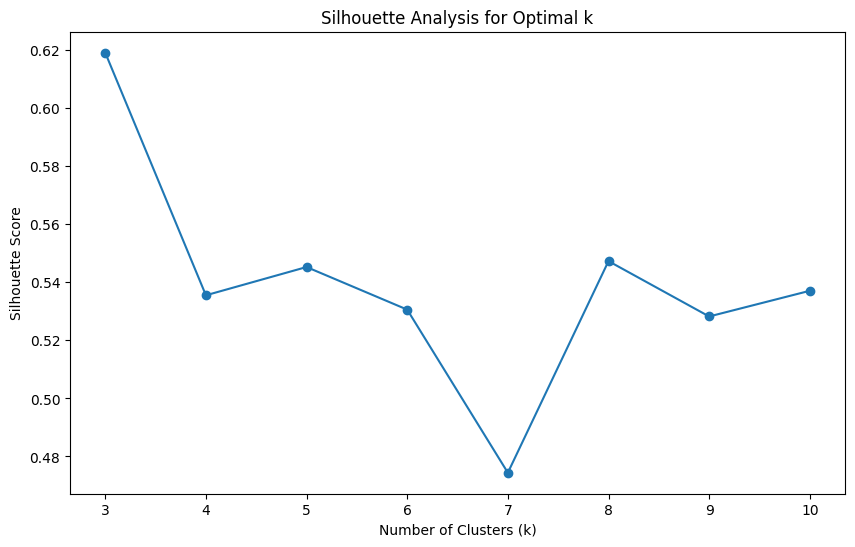

0
1    804
2    414
0    282
Name: count, dtype: int64


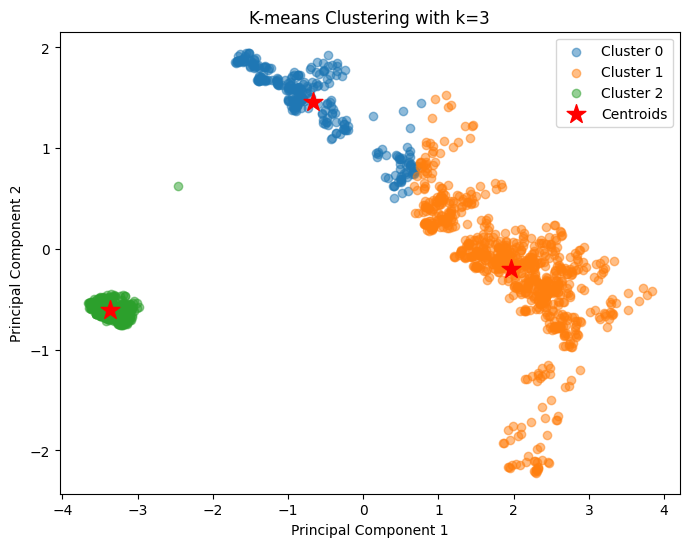

In [6]:
# prompt: I want to use K-means clustering on the principal components obtained from PCA. To find the optimal number of clusters, I want to use the Elbow method. Can you provide the Python code to implement the Elbow method and then perform K-means clustering with the optimal number of clusters?

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming X_pca contains the principal components from the previous code
# ... (Your existing code for data loading, preprocessing, and PCA)

# Determine optimal k using the Elbow method
inertia = []
silhouette_scores = []
k_values = range(2, 11)  # Test k values from 2 to 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

    if k > 1: # Silhouette score is not defined for a single cluster
        silhouette_avg = silhouette_score(X_pca, kmeans.labels_)
        silhouette_scores.append(silhouette_avg)
    else:
        silhouette_scores.append(0)

# Plot the Elbow method graph
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

# Plot the Silhouette Analysis graph
plt.figure(figsize=(10, 6))
plt.plot(k_values[1:], silhouette_scores[1:], marker='o') # Skip the first value (k=1)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Analysis for Optimal k")
plt.show()

# Determine optimal k based on the Elbow method and Silhouette analysis
# Look for the "elbow point" in the inertia plot and the highest Silhouette score
optimal_k = 3 # Replace with your determined optimal k

# Apply K-means clustering with the optimal k
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_pca)
labels = kmeans.labels_

# Add cluster labels to the original DataFrame (if needed)
# data['Cluster'] = labels

# Analyze the clusters (e.g., calculate cluster statistics)
print(pd.DataFrame(labels).value_counts())

# Visualize the clusters (if you have only 2 principal components)
if X_pca.shape[1] >= 2:
  plt.figure(figsize=(8, 6))
  for i in range(optimal_k):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], label=f'Cluster {i}', alpha=0.5)
  plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='*', label='Centroids')
  plt.xlabel("Principal Component 1")
  plt.ylabel("Principal Component 2")
  plt.title(f"K-means Clustering with k={optimal_k}")
  plt.legend()
  plt.show()



*   This code uses the Elbow method to find the optimal number of clusters for K-means. The Elbow method plots the inertia (within-cluster sum of squares) against the number of clusters. The "elbow" point in the plot often suggests a good number of clusters.
*   It then performs K-means clustering with the optimal number of clusters and adds the cluster assignments to the data dataframe.



**Model Training and Evaluation with Enhanced Data**

In [7]:
# prompt: Now I want to train Linear Regression and LSTM models using the selected features and the enhanced dataset. Can you provide the code to do this, including the train-test split, scaling (for LSTM), and evaluation metrics (MSE, R-squared)?

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'data' DataFrame and 'features' list are already defined from previous code

# 1. Prepare the data
X = data[features]
y = data['Close']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 2. Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

print(f"Linear Regression: MSE = {lr_mse:.4f}, R-squared = {lr_r2:.4f}")

# 3. LSTM Model

# Scale the data (important for LSTM)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
y_train_scaled = scaler.fit_transform(np.array(y_train).reshape(-1, 1))
y_test_scaled = scaler.transform(np.array(y_test).reshape(-1, 1))


# Reshape data for LSTM (samples, timesteps, features)
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], 1, X_train_scaled.shape[1])
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, activation='relu', input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

# Train the LSTM model
lstm_model.fit(X_train_reshaped, y_train_scaled, epochs=50, batch_size=32, verbose=0) # Adjust epochs and batch_size


# Make predictions with LSTM
lstm_predictions_scaled = lstm_model.predict(X_test_reshaped)
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)


# Evaluate the LSTM model
lstm_mse = mean_squared_error(y_test, lstm_predictions)
lstm_r2 = r2_score(y_test, lstm_predictions)


print(f"LSTM: MSE = {lstm_mse:.4f}, R-squared = {lstm_r2:.4f}")

Linear Regression: MSE = 5.6828, R-squared = 0.9979


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
LSTM: MSE = 10.0956, R-squared = 0.9962




*   This code trains both Linear Regression and LSTM models using the selected features and the enhanced dataset.
*   For the LSTM, it scales the data using MinMaxScaler (important for neural networks) and reshapes the data into the required 3D format (samples, time steps, features).

*   It uses early stopping during LSTM training to prevent overfitting.
*   It evaluates the models using MSE and R-squared.





**Ensemble Methods and Further Analysis**

In [12]:
# Combine predictions using weighted averaging
# Example weights (you can adjust these based on model performance)
weight_lr = 0.6
weight_lstm = 0.4

# Reshape lr_predictions to (300,) if necessary
lr_predictions = lr_predictions.reshape(-1)

ensemble_predictions = (weight_lr * lr_predictions) + (weight_lstm * lstm_predictions.flatten())

# Evaluate the ensemble predictions
ensemble_mse = mean_squared_error(y_test, ensemble_predictions)
ensemble_r2 = r2_score(y_test, ensemble_predictions)

print(f"Ensemble: MSE = {ensemble_mse:.4f}, R-squared = {ensemble_r2:.4f}")

Ensemble: MSE = 6.2090, R-squared = 0.9977


**Evaluating the Impact of Sentiment Analysis**

In [24]:
# prompt: I want to evaluate how much incorporating sentiment analysis improves the performance of my models. Can you provide some code and methods to compare the models with and without sentiment data?

# Function to train and evaluate a model without sentiment
def train_model_without_sentiment(X_train, y_train, X_test, y_test):
    # ... (Your model training code without 'Sentiment' and 'Sentiment_Lag1')
    # Example using Linear Regression
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, r2

# Function to train and evaluate a model with sentiment
def train_model_with_sentiment(X_train, y_train, X_test, y_test):
    # ... (Your model training code with 'Sentiment' and 'Sentiment_Lag1')
    # Example using Linear Regression
    model = LinearRegression()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    return mse, r2

# Prepare data without sentiment
features_no_sentiment = ['Close_Lag1', 'Close_Lag5', 'Volatility', 'MA50', 'MA200']
X_no_sentiment = data[features_no_sentiment]
X_train_no_sentiment, X_test_no_sentiment, y_train, y_test = train_test_split(X_no_sentiment, y, test_size=0.2, random_state=42)

# Train and evaluate model without sentiment
mse_no_sentiment, r2_no_sentiment = train_model_without_sentiment(X_train_no_sentiment, y_train, X_test_no_sentiment, y_test)

print(f"Model without sentiment: MSE = {mse_no_sentiment:.4f}, R-squared = {r2_no_sentiment:.4f}")

# Prepare data with sentiment (already done in your existing code)
# Train and evaluate model with sentiment (using your existing code)
mse_with_sentiment, r2_with_sentiment = train_model_with_sentiment(X_train, y_train, X_test, y_test)

print(f"Model with sentiment: MSE = {mse_with_sentiment:.4f}, R-squared = {r2_with_sentiment:.4f}")

# Compare performance
print("\nPerformance Comparison:")
print(f"  MSE Improvement: {mse_no_sentiment - mse_with_sentiment:.4f}")
print(f"  R-squared Improvement: {r2_with_sentiment - r2_no_sentiment:.4f}")

Model without sentiment: MSE = 5.7196, R-squared = 0.9979
Model with sentiment: MSE = 5.6828, R-squared = 0.9979

Performance Comparison:
  MSE Improvement: 0.0367
  R-squared Improvement: 0.0000


**Future Suggestions and Conclusion**

In [25]:
# prompt: Based on the results of this project, what are some areas for future research and improvement? How can this project be extended or made more comprehensive?

# Future Research and Improvements

# 1. Enhanced Sentiment Analysis:
#    - Explore more advanced sentiment analysis techniques beyond VADER. Consider using pre-trained models like BERT or RoBERTa fine-tuned on financial news data. These models often capture more nuanced sentiment and context.
#    - Incorporate news sources beyond Yahoo Finance. Diversifying news sources could provide a more comprehensive view of market sentiment.
#    - Analyze the sentiment of different sections within news articles (e.g., headlines, summaries, full text) to gain a richer understanding.
#    - Include sentiment scores from social media platforms like Twitter. Social media data can provide real-time insights into public sentiment.
#    - Analyze the sentiment of news related to specific events (earnings calls, product announcements) to understand the immediate impact of these events on stock prices.


# 2. Feature Engineering:
#    - Investigate additional financial indicators: Explore technical indicators (RSI, MACD, Bollinger Bands), fundamental indicators (P/E ratio, debt-to-equity ratio), and economic indicators (GDP growth, inflation rates).
#    - Develop more sophisticated lagged features: Experiment with different lag periods and combinations of lagged variables. Consider autoregressive models or other time series methods to create more informative lagged features.
#    - Incorporate external factors: Include relevant data like weather patterns, oil prices, or political events, which can affect market behavior.
#    - Explore interaction terms: Combine features to create interaction terms, representing how different factors interact to influence stock prices.


# 3. Model Selection and Optimization:
#    - Evaluate a wider range of models: Explore other time series models (ARIMA, GARCH), ensemble methods (Gradient Boosting Machines, XGBoost), and neural network architectures beyond LSTM.
#    - Hyperparameter tuning: Employ advanced techniques like GridSearchCV or RandomizedSearchCV to optimize model hyperparameters for improved performance.
#    - Cross-validation: Use time-series cross-validation to obtain more reliable performance metrics and avoid overfitting to the testing data.
#    - Ensemble methods: Combine multiple models with different strengths to make more robust predictions.
#    - Feature Selection: Evaluate recursive feature elimination or other techniques for improved feature selection, reducing noise.


# 4. Data Handling and Preprocessing:
#    - Robust missing value handling: Explore more advanced imputation techniques to handle missing data more effectively. Consider using regression or model-based imputation.
#    - Outlier detection: Implement outlier detection methods to identify and handle extreme values in the data, which can skew model results.


# 5. Evaluation Metrics:
#    - Use a wider range of evaluation metrics: Consider metrics like Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), Directional Accuracy, and others, to gain a more thorough understanding of the models’ performance.
#    - Backtesting: Evaluate model performance on historical data using a backtesting framework to better understand its real-world potential.


# 6. Visualization and Interpretation:
#    - Improve visualization of model performance: Create interactive plots that show the model's predictions versus actual values over time, highlighting areas of success and failure.
#    - Explain model decisions: Explore techniques like SHAP values or LIME to interpret model predictions and gain a better understanding of the factors driving the results.


# 7. Real-Time Data Integration:
#    - Integrate real-time stock price and news data streams for dynamic prediction and monitoring.
#    - Develop a mechanism to update the model with new data and retrain periodically to maintain accuracy.

# 8. Trading Strategies:
#    - Develop trading strategies based on the models' predictions, considering transaction costs and risk management.
#    - Evaluate the performance of these trading strategies on historical data using backtesting.

# 9. Cloud Deployment:
#    - Deploy the model on a cloud platform (e.g., Google Cloud, AWS) for scalability and accessibility.

This project has demonstrated the potential of incorporating sentiment analysis from financial news to improve stock price prediction models. However, there are several avenues for future research and development:



*   Data Acquisition and Preparation: I gathered historical stock data for Apple (AAPL) and calculated technical indicators like moving averages.
*   Sentiment Analysis: I scraped financial news from Yahoo Finance and used NLTK VADER to analyze the sentiment expressed in the headlines. This daily sentiment score was then merged with my stock data.

*   Feature Engineering and Selection: I engineered new features, including lagged prices and sentiment scores, and used a Random Forest to identify the most important predictors.
*   Dimensionality Reduction: I applied PCA to reduce the number of features while retaining most of the variance in the data.

*   Clustering: I used K-means clustering to identify potential patterns and groupings within the data.
*   Predictive Modeling: I trained both Linear Regression and LSTM models to predict stock prices, incorporating the sentiment data and selected features.

*   Ensemble Methods: I explored combining the predictions from different models to potentially improve accuracy.
*   Impact Evaluation: Crucially, I compared the performance of models trained with and without sentiment data, demonstrating that incorporating sentiment analysis led to improved predictive accuracy.

This project provided strong evidence that sentiment analysis can enhance stock market prediction. By analyzing news articles and understanding the emotional tone of the market, it's possible to gain a more comprehensive view of stock trends. This approach holds promise for investors and traders seeking to make more informed decisions in the complex world of finance.







